In [1]:
from IPython.display import Markdown, display

display(Markdown("header.md"))

<div>
    <img src="images/emlyon.png" style="height:60px; float:left; padding-right:10px; margin-top:5px" />
    <span>
        <h1 style="padding-bottom:5px;"> AI Booster Week 02 - Python for Data Science </h1>
        <a href="https://masters.em-lyon.com/fr/msc-in-data-science-artificial-intelligence-strategy">[Emlyon]</a> MSc in Data Science & Artificial Intelligence Strategy (DSAIS) <br/>
         Paris | © Antoine SCHERRER
    </span>
</div>

Please make sure you have a working installation of Jupyter Notebook / Jupyter Lab, with Python 3.6+ up and running.

## Naming conventions

Since we will implement functions that are already available in python standard library or other libraries, you will have to *prefix* every function with `msds_` prefix.

For instance, the function implementing the `mean` function should be named `msds_mean`.

For every function you write, **you will need to write a test function** that should be named `test_[function_name]`.

For instance, the test function for `msds_mean` will be: `test_msds_mean`.

**don't forget to document all you function with Python docstring**

For instance:
```
def msds_my_awesome_function():
    """
    This function computes an awesome function
    """
    # Awesome code
    ...
```

All function should be in snake case (no Camel case!)

When creating classes, then follow these rules:
 - class names should be in camel case
 - method names should be in snake case
 - attribute names should be in snake case

## Exercise's difficulty

Every exercise will be prefixed with an indication of its difficulty:
 - [easy]: easy exercise, should be pretty straightforward for you
 - [moderate]: intermediate level exercise, you all should manage to solve them
 - [advanced]: for advanced students who want to go deeper/further

**Advanced exercises are not mandatory.**

## Required libraries

These are the libraries we will use (to check our computations for instance), you need to install them in your virtual environment:

 - `pandas`: data manipulation library
 - `scipy`: scientific library in Python
 - `numpy`: vector/matrix computations
 - `statistics`: statistics library
 - `matplotlib`: plotting lib
 - `seaborn`: alternative plotting lib (based on matplotlib)
 - `jupyter_black`: plugin for jupyter to allow `black` (code formatter) to run
 - `unittest`: testing library 




# Session 04 - Hypothesis testing

In [2]:
# Basic imports
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sb

# Ignore warnings from seaborn
import warnings

warnings.filterwarnings("ignore")
from pprint import pprint
import jupyter_black

jupyter_black.load()

## Normal distribution 

We will perform some computation on the normal distribution function.

### [easy] (already done in week1!) Normal PDF

Write a function that computes the probability distribution function of a normal distribution.

$\Large	\frac1{\sigma\sqrt{2\pi}}\; \exp\left(-\frac{\left(x-\mu\right)^2}{2\sigma^2} \right)$

Test your function by plotting it !

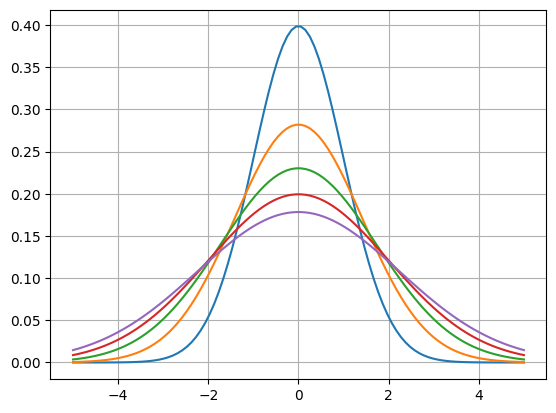

In [3]:
def msds_normal_pdf(x, mu, sigma2):
    """
    Compute the normal probability distribution (mean mu and variance sigma2) function at x
    """
    return 1 / math.sqrt(2 * math.pi * sigma2) * math.exp(-0.5 * (x - mu) ** 2 / sigma2)


def test_msds_normal_pdf():
    assert msds_normal_pdf(0, 0, 1) == 1 / math.sqrt(2 * math.pi)
    X = np.linspace(-5, 5, num=100)
    Y = []
    for s in np.linspace(1, 5, num=5):
        Y = [msds_normal_pdf(x, 0, s) for x in X]
        plt.plot(X, Y)
        plt.grid()


test_msds_normal_pdf()

### [easy] Normal CDF

Write a function that computes the cumulative probability distribution function of a normal distribution.

${\displaystyle {\frac {1}{2}}\left(1+\mathrm {erf} \left({\frac {x-\mu }{\sigma {\sqrt {2}}}}\right)\right)\!~}$

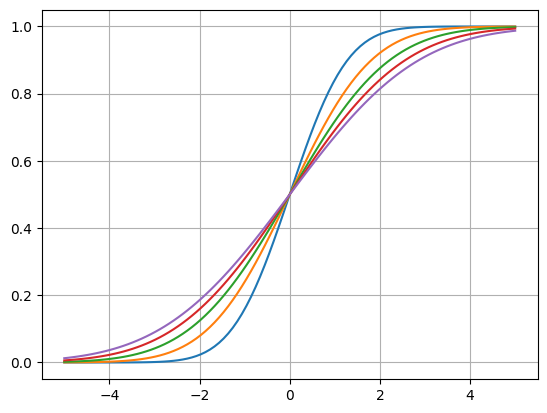

In [4]:
def msds_normal_cdf(x, mu, sigma2):
    """
    Compute the normal cumulative distribution (mean mu and variance sigma2) function at x
    """
    return 0.5 * (1 + math.erf((x - mu) / math.sqrt(2 * sigma2)))


def test_msds_normal_cdf():
    assert msds_normal_cdf(0, 0, 1) == 0.5
    X = np.linspace(-5, 5, num=100)
    Y = []
    for s in np.linspace(1, 5, num=5):
        Y = [msds_normal_cdf(x, 0, s) for x in X]
        plt.plot(X, Y)
        plt.grid(zorder=0)


test_msds_normal_cdf()

### [easy] Standardize data

Write a function that "standardize" some data by computing:

$\Large Z = \frac{X - \bar{X}}{S_X}$

with:
 - $\bar{X}$ is the sample mean
 - $S_{X}$ is the sample variance

In [5]:
def msds_standardize(data):
    """
    Standardize data (Z=(X-mu)/sigma)
    """
    sm = np.mean(data)
    std = math.sqrt(np.var(data, ddof=1))
    if std > 0:
        return [(x - sm) / std for x in data]


def test_msds_standardize():
    data = [1, 2, 3, 4, 5]
    st_data1 = msds_standardize(data)
    assert np.mean(st_data1) < 1e-10
    assert (1 - np.var(st_data1, ddof=1)) < 1e-5


test_msds_standardize()

## [moderate] Plot histogram of standardized data and $N(0,1)$

Write a function that draws, given some data, the histogram of the standardized data and the standardized normal distribution.
In order to make a fair comparison, you will have to make some scaling adjustment...

This can be done to evaluate the normality of a data set.

Test on `heights_weights.csv`

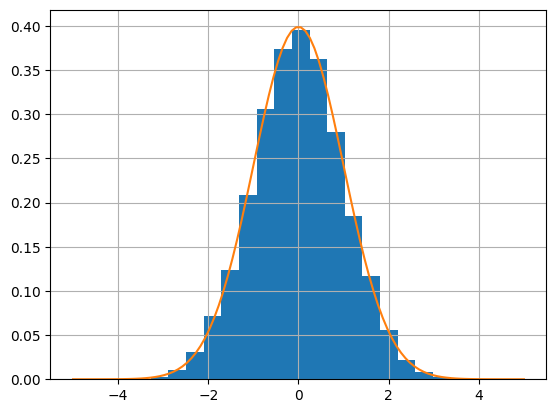

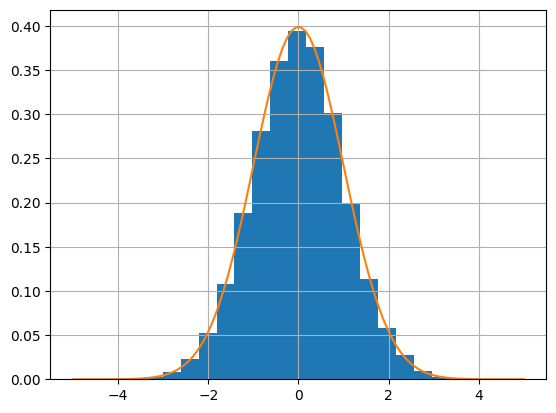

In [14]:
def msds_check_normality(data):
    plt.figure()
    s = pd.Series(data)
    s.hist(density=True, bins=20)
    X = np.linspace(-5, 5, num=100)
    dx = 1
    Y = [msds_normal_pdf(x, 0, 1) * dx for x in X]
    sb.lineplot(x=X, y=Y, color=sb.color_palette()[1])


def test_msds_check_normality():
    weighs_heights = pd.read_csv("data/heights_weights.csv")
    heights = msds_standardize(weighs_heights["Height(Inches)"])
    msds_check_normality(heights)
    weights = msds_standardize(weighs_heights["Weight(Pounds)"])
    msds_check_normality(weights)


test_msds_check_normality()

## Hypothesis testing


### [moderate] Simple hypothesis testing for mean (variance known, two-tailed)

Write a function that will output a decision based on:
 - a risk level or significance level ($\alpha$)
 - a data sample
 - a mean value ($H_0$ is that the true mean is the value given)
 - the population variance ($\sigma^2$)

Compute the test statistic: 

$\Large Z = \frac{\bar{X}-\mu}{\sigma\sqrt{N}}$
Your function should output True is we accept $H_0$, False ortherwise.

Your function should also explain with prints why this decision is made.

Your function should also print the associated $p$-value.

**You don't have to compute Normal distribution's inverse CDF values, for that you can use packages!**

Take the time to play with the different parameters to check you understand completely what is going on!

In [ ]:
from scipy.stats import norm


def msds_hyphothesis_mean_test(alpha, sample_mean, N, th_mean, sigma2):
    """
    Perform mean test (known variance)
    """
    Z = (sample_mean - th_mean) / math.sqrt(sigma2 / N)
    critical_value = norm.ppf(1 - alpha / 2)
    pvalue = 2 * (1 - norm.cdf(Z))
    if abs(Z) > critical_value:
        print(
            f"Reject Ho (mean is NOT likely to be {th_mean})!\n Z={Z:.04f} C={critical_value:.04f} alpha={alpha:.04f} p-value={pvalue:.04f}"
        )
        return False
    else:
        print(
            f"Cannot reject Ho (mean is likely to be {th_mean})!\n Z={Z:.04f} C={critical_value:.04f} alpha={alpha:.04f} p-value={pvalue:.04f}"
        )
        return True


def test_msds_hyphothesis_mean_test():
    assert msds_hyphothesis_mean_test(0.1, 6, 10, 5, 2) == False
    assert msds_hyphothesis_mean_test(0.1, 5.1, 100, 5, 2) == True
    assert msds_hyphothesis_mean_test(0.05, 5.1, 1000, 5, 2) == False


test_msds_hyphothesis_mean_test()

### [moderate] Simple hypothesis testing for mean (variance unknown, two-tailed)

Write a very simialar function, but when variance is not known.

In this case the $Z$ statistics will follow a Student's T distribution.

**You don't have to compute Student's T distribution's inverse CDF values, for that you can use a library such as `scipy.stats`!**


In [ ]:
from scipy.stats import t


def msds_hyphothesis_mean_test_t(alpha, sample_mean, N, th_mean, sample_variance):
    """
    Perform mean test (unknown variance)
    """
    Z = (sample_mean - th_mean) / math.sqrt(sample_variance / N)
    critical_value = t.ppf(1 - alpha / 2, df=N - 1)
    pvalue = 2 * (1 - t.cdf(Z, df=N - 1))
    if abs(Z) > critical_value:
        print(f"Reject Ho! Z={Z} C={critical_value}")
        return False
    else:
        print(f"Accept Ho! Z={Z} C={critical_value}")
        return True


def test_msds_hyphothesis_mean_test2():
    assert msds_hyphothesis_mean_test_t(0.1, 6, 10, 5, 2) == False
    assert msds_hyphothesis_mean_test_t(0.1, 5.1, 100, 5, 2) == True
    assert msds_hyphothesis_mean_test_t(0.05, 5.1, 1000, 5, 2) == False


test_msds_hyphothesis_mean_test2()

### [moderate] Application to data (single tail)

Grand Junction Vegetables is a producer of a wide variety of frozen vegetables. Thecompany president has asked you to determine if the weekly sales of 16-ounce packagesof frozen broccoli has increased. The mean weekly number of sales per store has been2400 packages over the past 6 months. You have obtained a random sample of salesdata from 134 stores for your study. The data are contained in the data file `broccoli.csv`.

 - Evaluate the situation by performing a hypothesis test
 - state $H_0$ and $H_1$
 - compute test statistics and formulate your answer to your president!



In [ ]:
# H0: mu = 2400
# H1: mu > 2400 (single tail)
exp_mean = 2400
data = pd.read_csv("data/broccoli.csv", sep=";")
print(data)
N = len(data)
print(len(data))
broccoli_sales = data.Broccoli
sample_mean = msds_mean(broccoli_sales)
sample_std = msds_sample_std(broccoli_sales)
print(
    f"sample_mean={sample_mean} sample_std={sample_std} min={min(broccoli_sales)} max={max(broccoli_sales)}"
)
signifiance = 0.05
Z = (sample_mean - exp_mean) / (sample_std / math.sqrt(N))

C = t.ppf(1 - signifiance, df=N - 1)
pvalue = 1 - t.cdf(Z, df=N - 1)
print(f"Z={Z} C={C} pvalue={pvalue}")
print("We reject the H0 and consider avec price has increased")